1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def load_data(file_path):
    """Read the dataset and extract relevant columns."""
    data = pd.read_csv(file_path)
    X = data.drop(columns=["FloodProbability"])  # Use all except target
    y = (data["FloodProbability"] > 0.5).astype(int)  # Convert to binary classification
    return X, y

def preprocess_data(X):
    """Normalize the numeric features."""
    return StandardScaler().fit_transform(X)

def train_knn(X_train, y_train, k=3):
    """Train the k-NN model with k neighbors."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate(y_true, y_pred):
    """Calculate accuracy, confusion matrix, precision, recall, and F1-score."""
    cm = confusion_matrix(y_true, y_pred)
    return accuracy_score(y_true, y_pred), cm, precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

# Load and prepare data
X, y = load_data("flood.csv")
X_train, X_test, y_train, y_test = train_test_split(preprocess_data(X), y, test_size=0.3, random_state=42)

# Train the model and make predictions
model = train_knn(X_train, y_train)
y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)

# Evaluate the model
train_acc, train_cm, train_prec, train_rec, train_f1 = evaluate(y_train, y_train_pred)
test_acc, test_cm, test_prec, test_rec, test_f1 = evaluate(y_test, y_test_pred)

# Display results
print(f"Training Accuracy: {train_acc:.3f}\nTesting Accuracy: {test_acc:.3f}")
print(f"\nConfusion Matrix (Training):\n{train_cm}\nConfusion Matrix (Testing):\n{test_cm}")
print(f"\nTraining - Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1 Score: {train_f1:.3f}")
print(f"Testing - Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1 Score: {test_f1:.3f}")

# Analyze model performance
if train_acc > 0.95 and test_acc < (train_acc - 0.2):
    print("\nThe model is overfitting.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("\nThe model is underfitting.")
else:
    print("\nThe model has a good balance.")


Training Accuracy: 0.842
Testing Accuracy: 0.727

Confusion Matrix (Training):
[[50  6]
 [10 35]]
Confusion Matrix (Testing):
[[17  3]
 [ 9 15]]

Training - Precision: 0.833, Recall: 0.893, F1 Score: 0.862
Testing - Precision: 0.654, Recall: 0.850, F1 Score: 0.739

The model has a regular fit.


A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path, sheet_name):
    """Read stock data from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def split_data(data, features, target, test_size=0.2, random_state=42):
    """Divide data into training and testing sets."""
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_linear_model(X_train, y_train):
    """Train a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def predict(model, X_test):
    """Generate predictions using the trained model."""
    return model.predict(X_test)

def calculate_metrics(y_true, y_pred):
    """Compute MSE, RMSE, MAPE, and R² score."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

def main():
    """Run the stock price prediction model."""
    file_path = "Assignment1/Lab Session Data.xlsx"
    sheet_name = "IRCTC Stock Price"

    data = load_data(file_path, sheet_name)
    X_train, X_test, y_train, y_test = split_data(data, ["Open", "High", "Low"], "Price")

    model = train_linear_model(X_train, y_train)
    y_pred = predict(model, X_test)

    mse, rmse, mape, r2 = calculate_metrics(y_test, y_pred)

    # Display results
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")

if __name__ == "__main__":
    main()


Mean Squared Error (MSE): 188.4684
Root Mean Squared Error (RMSE): 13.7284
Mean Absolute Percentage Error (MAPE): 0.53%
R-squared Score (R²): 0.9972


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.

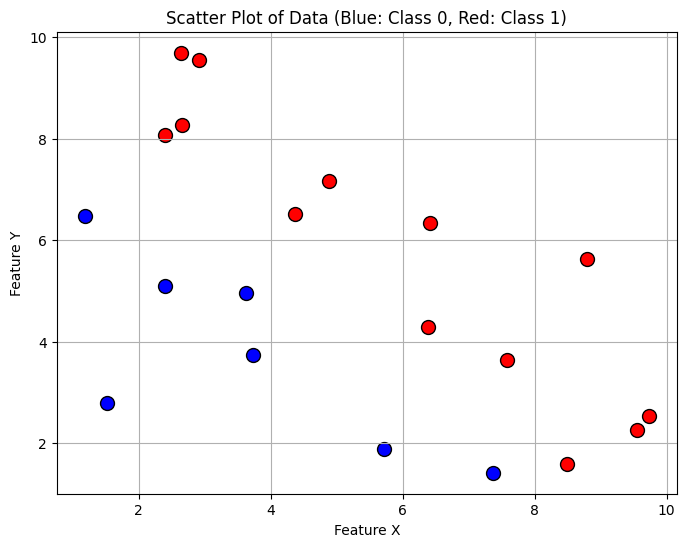

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_data(num_points=20, value_range=(1, 10)):
    """Generate random feature values within a given range."""
    np.random.seed(42)  # Ensures consistent results
    x = np.random.uniform(value_range[0], value_range[1], num_points)
    y = np.random.uniform(value_range[0], value_range[1], num_points)
    return x, y

def assign_classes(x, y, threshold=10):
    """Assign class labels based on a threshold condition."""
    return (x + y > threshold).astype(int)

def plot_data(x, y, labels):
    """Scatter plot with different colors for each class."""
    plt.figure(figsize=(8, 6))
    
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color='red' if labels[i] else 'blue', edgecolors='black', s=100)

    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Scatter Plot of Data (Blue: Class 0, Red: Class 1)")
    plt.grid(True)
    plt.show()

# **Main Execution**
X, Y = generate_random_data()  # Generate data
labels = assign_classes(X, Y)  # Assign class labels
plot_data(X, Y, labels)  # Display scatter plot


4.Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.

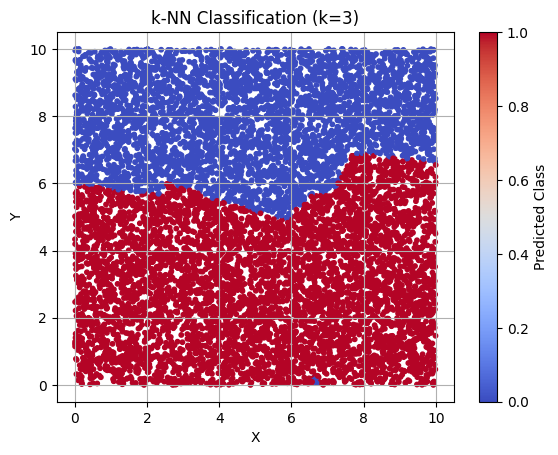

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_data(points, x_range, y_range, with_labels=False):
    """Generate dataset with random values within the given range."""
    X = np.random.uniform(x_range[0], x_range[1], (points, 2))
    y = np.random.choice([0, 1], size=points) if with_labels else None
    return X, y

def train_and_predict(X_train, y_train, X_test, k=3):
    """Train k-NN model and predict labels for test data."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def plot_results(X, predictions):
    """Plot test data with colors representing predicted classes."""
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"k-NN Classification (k={3})")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

# **Main Execution**
X_train, y_train = generate_data(20, (1, 10), (1, 10), with_labels=True)
X_test, _ = generate_data(10000, (0, 10), (0, 10))
y_pred = train_and_predict(X_train, y_train, X_test, k=3)
plot_results(X_test, y_pred)


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

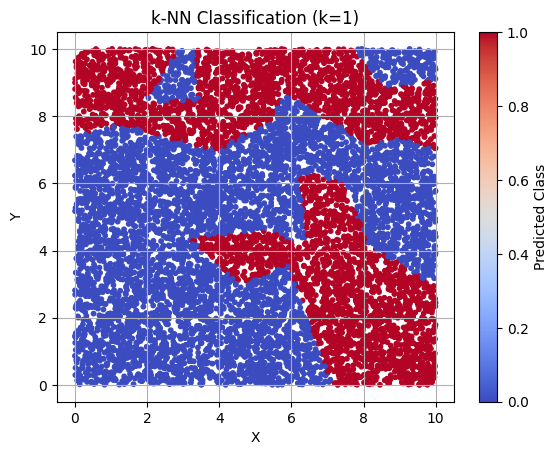

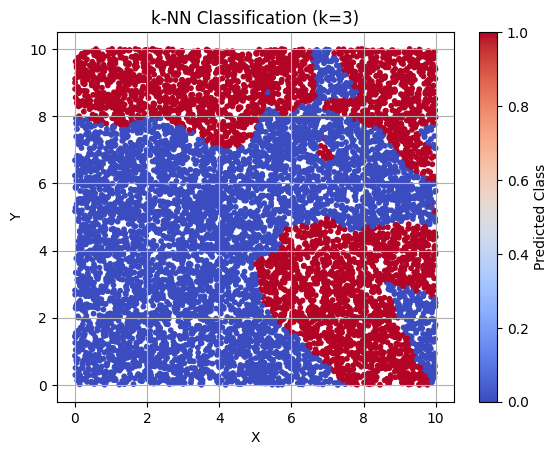

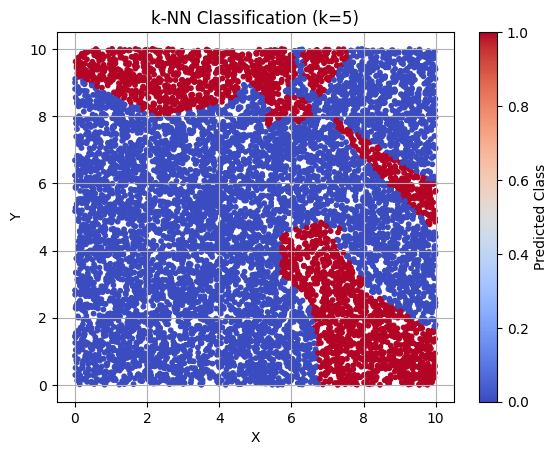

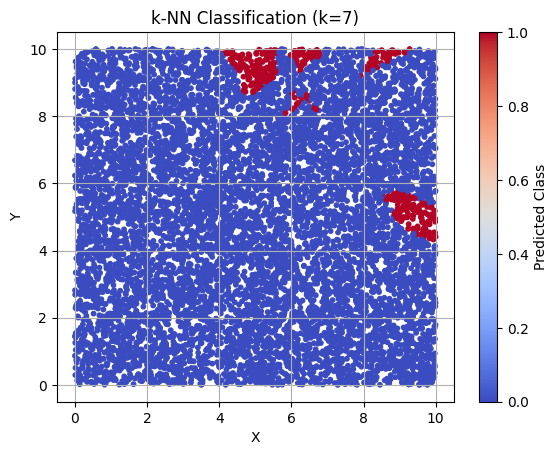

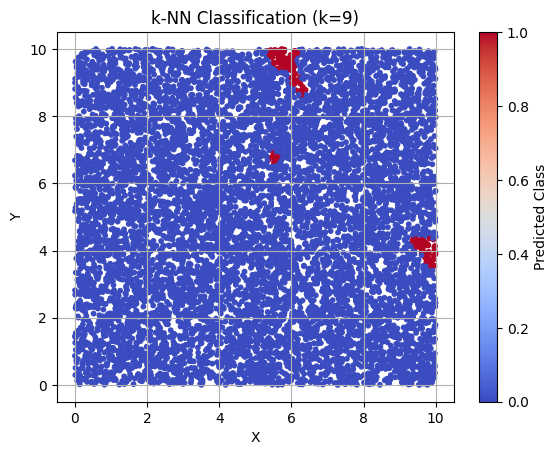

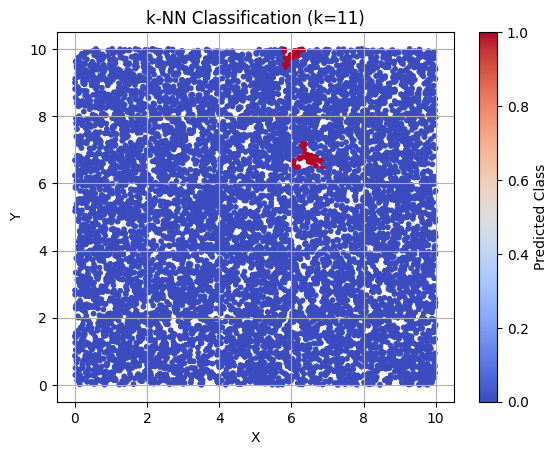

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_data(points, x_range, y_range, labeled=False):
    """Generate random data points within the given range."""
    X = np.random.uniform(x_range[0], x_range[1], (points, 2))
    y = np.random.choice([0, 1], size=points) if labeled else None
    return X, y

def train_and_predict(X_train, y_train, X_test, k):
    """Train k-NN model and predict labels for test data."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model.predict(X_test)

def plot_results(X, predictions, k):
    """Plot test data with colors representing predicted classes."""
    plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"k-NN Classification (k={k})")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

# **Main Execution**
X_train, y_train = generate_data(20, (1, 10), (1, 10), labeled=True)
X_test, _ = generate_data(10000, (0, 10), (0, 10))

# Test k-NN with multiple k values and visualize results
for k in [1, 3, 5, 7, 9, 11]:
    y_pred = train_and_predict(X_train, y_train, X_test, k)
    plot_results(X_test, y_pred, k)


A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

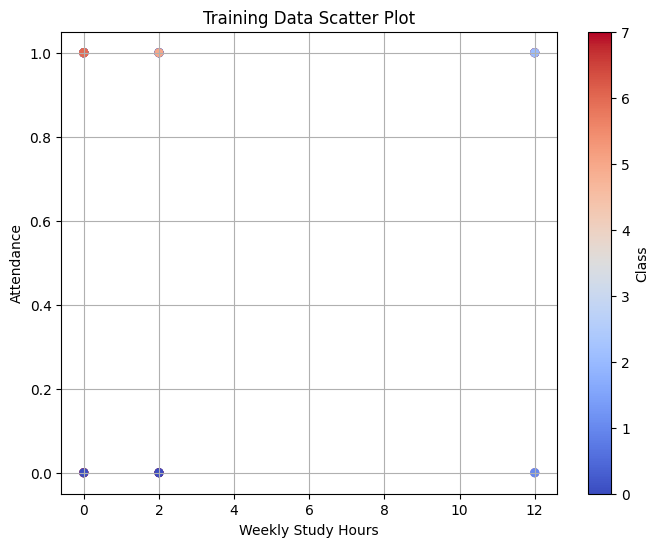

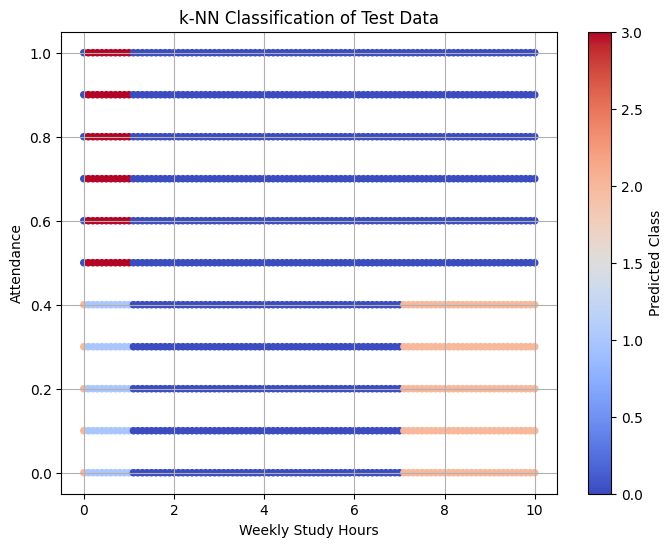

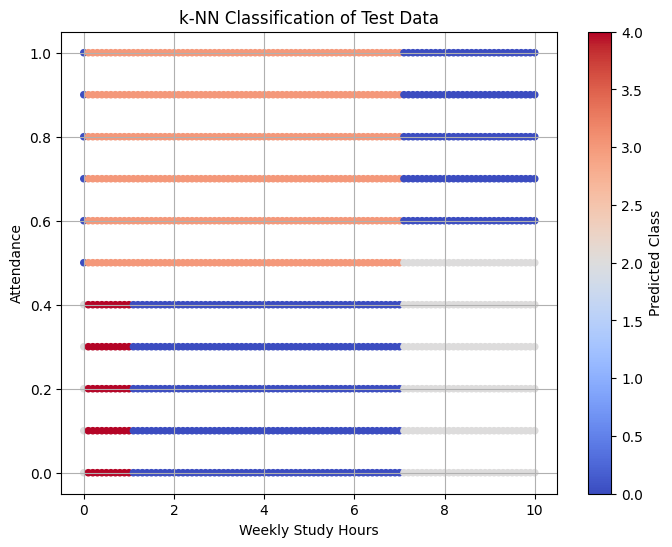

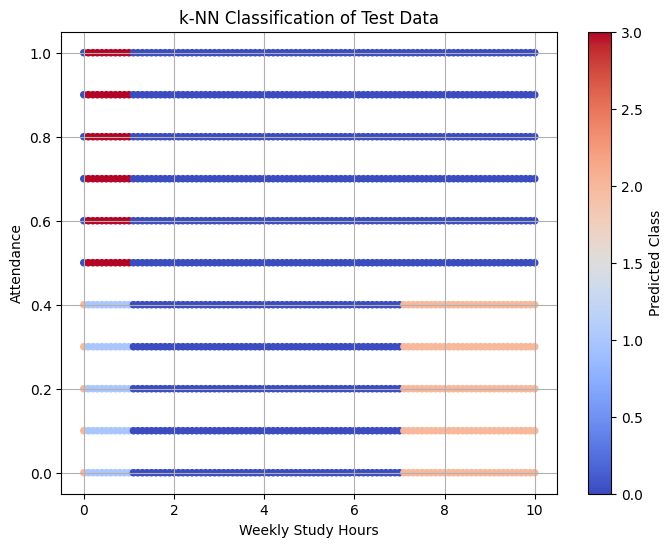

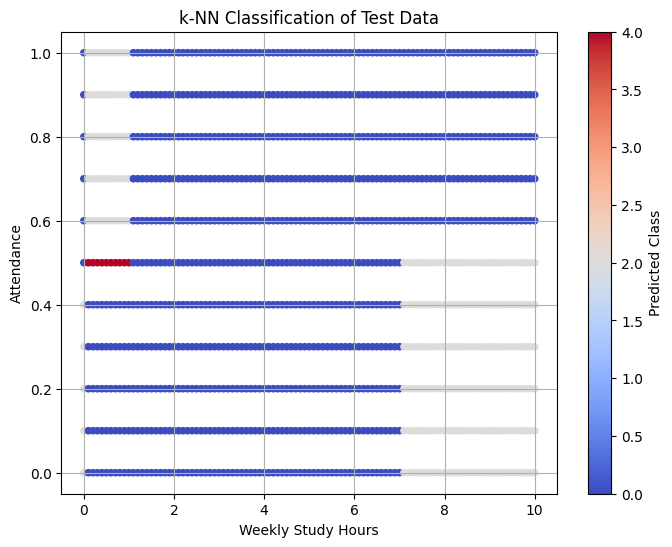

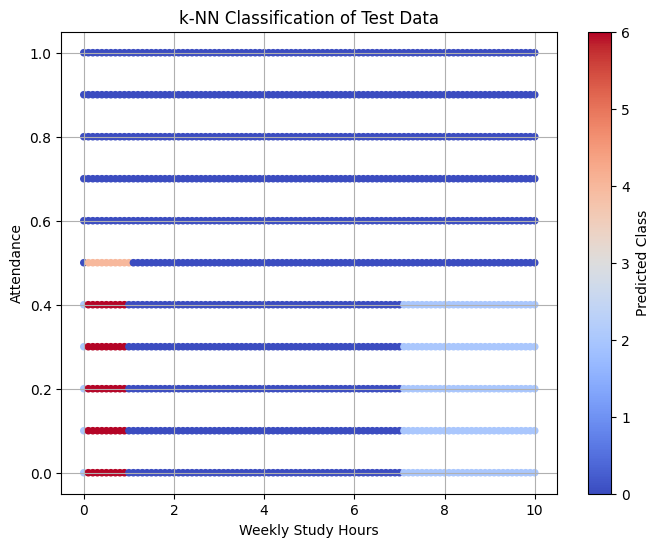

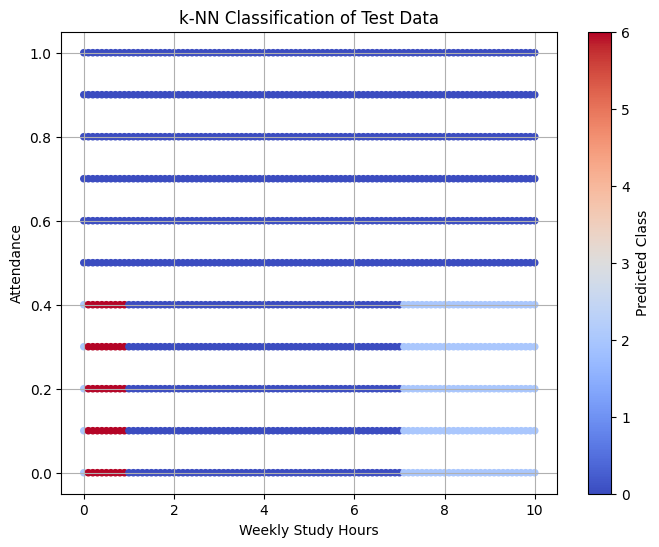

In [125]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def load_data(file_path):
    """Read the dataset and extract relevant columns."""
    data = pd.read_csv(file_path)
    X = data.drop(columns=["FloodProbability"])  # Use all except target
    y = (data["FloodProbability"] > 0.5).astype(int)  # Convert to binary classification
    return X, y

def preprocess_data(X):
    """Normalize the numeric features."""
    return StandardScaler().fit_transform(X)

def train_knn(X_train, y_train, k=3):
    """Train the k-NN model with k neighbors."""
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate(y_true, y_pred):
    """Calculate accuracy, confusion matrix, precision, recall, and F1-score."""
    cm = confusion_matrix(y_true, y_pred)
    return accuracy_score(y_true, y_pred), cm, precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

# Load and prepare data
X, y = load_data("flood.csv")
X_train, X_test, y_train, y_test = train_test_split(preprocess_data(X), y, test_size=0.3, random_state=42)

# Train the model and make predictions
model = train_knn(X_train, y_train)
y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)

# Evaluate the model
train_acc, train_cm, train_prec, train_rec, train_f1 = evaluate(y_train, y_train_pred)
test_acc, test_cm, test_prec, test_rec, test_f1 = evaluate(y_test, y_test_pred)

# Display results
print(f"Training Accuracy: {train_acc:.3f}\nTesting Accuracy: {test_acc:.3f}")
print(f"\nConfusion Matrix (Training):\n{train_cm}\nConfusion Matrix (Testing):\n{test_cm}")
print(f"\nTraining - Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1 Score: {train_f1:.3f}")
print(f"Testing - Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1 Score: {test_f1:.3f}")

# Analyze model performance
if train_acc > 0.95 and test_acc < (train_acc - 0.2):
    print("\nThe model is overfitting.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("\nThe model is underfitting.")
else:
    print("\nThe model has a good balance.")


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning.

In [113]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {'n_neighbors': np.random.randint(1, 21, 10)}  # Randomly select 10 k values between 1 and 20

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Perform Random Search
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best k value
best_k_random = random_search.best_params_['n_neighbors']
best_score_random = random_search.best_score_

print(f"Best k value (Randomized Search): {best_k_random}")
print(f"Best cross-validation accuracy: {best_score_random:.4f}")

# Train the final model with the best k value
best_knn_random = KNeighborsClassifier(n_neighbors=best_k_random)
best_knn_random.fit(X_train, y_train)

# Evaluate on test data
test_pred_random = best_knn_random.predict(X_test)
test_accuracy_random = accuracy_score(y_test, test_pred_random)

print(f"Test Accuracy with best k ({best_k_random}): {test_accuracy_random:.4f}")


c:\Users\vinee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best k value (Randomized Search): 5
Best cross-validation accuracy: 0.2076
Test Accuracy with best k (5): 0.2045
